In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
#from pixell import reproject
#from classy import Class
%matplotlib inline
import s1 
import pysm3 
import ST

In [10]:
res2048_arcmin = hp.nside2resol(2048, arcmin=True)
res1024_arcmin = hp.nside2resol(1024, arcmin=True)
res512_arcmin = hp.nside2resol(512, arcmin=True)
res256_arcmin = hp.nside2resol(256, arcmin=True)
res2048 = hp.nside2resol(2048, arcmin=False)
res1024 = hp.nside2resol(1024, arcmin=False)
res512 = hp.nside2resol(512, arcmin=False)
res256 = hp.nside2resol(256, arcmin=False)

In [11]:
cmap = plt.cm.RdBu

In [12]:
c__256 = 'C0'
c__512 = 'C1'
c_1024 = 'C2'
c_proj = 'C2'
c_fgen = 'C3'

In [13]:
map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")

In [14]:
#map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/COM_CompMap_SZ-commander_0256_R2.00.fits")

In [61]:
map_sz_0256 = hp.ud_grade(map_sz , nside_out=256)
map_sz_0256 += np.abs(min(map_sz_0256))
#map_sz_0256 /= np.sum(map_sz_0256)

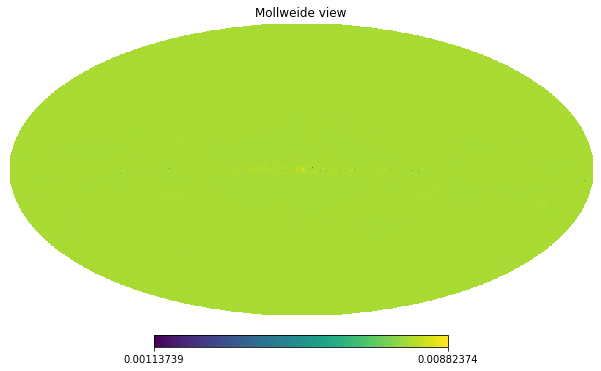

In [116]:
hp.mollview(map_sz_0256)

In [63]:
cl_sz_0256 = hp.anafast(map_sz_0256)

In [64]:
nside_0256 = 256

In [65]:
lmax_0256=3*nside_0256-1
ell_0256=np.arange(0,lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
dl_sz_0256 = cl_sz_0256*norm_0256

<ipython-input-66-a69032c6eb21>:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256
<ipython-input-66-a69032c6eb21>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(ellsc_0256,np.log(dl_sz_0256))


Text(0, 0.5, '$D_l$')

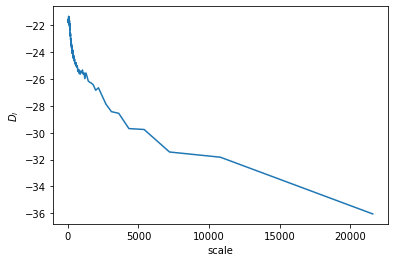

In [66]:
ellsc_0256 = 360*60/ell_0256
#ellsc = ellsc[::-1]
plt.plot(ellsc_0256,np.log(dl_sz_0256))
plt.xlabel("scale")
plt.ylabel("$D_l$")

In [67]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)

In [68]:
jmax = 8
theta_bin = 10000

In [69]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*res256_arcmin)/0.75)

In [70]:
mor_l_0256 = s1.morlet_arr (resol_0256, jmax , lmax_0256, theta_bin)
gaus_l_0256 = s1.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [71]:
%%time 
s1_sz_0256 , i1_sz_0256 = ST.compS1 (map_sz_0256 , mor_l_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7
CPU times: user 1.9 s, sys: 61.6 ms, total: 1.96 s
Wall time: 554 ms


In [72]:
map_sz_0256_out = hp.synfast (cl_sz_0256,nside_0256)
map_sz_0256_out += min(map_sz_0256_out)
#map_sz_0256_out /= np.sum(map_sz_0256_out)

In [73]:
s1_sz_0256_out , i1_sz_0256_out = ST.compS1 (map_sz_0256_out , mor_l_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7


In [86]:
s0_sz_0256 = np.mean (np.abs(map_sz_0256))
s0_sz_0256_out = np.mean (np.abs(map_sz_0256_out))

Text(0, 0.5, '$Sl$')

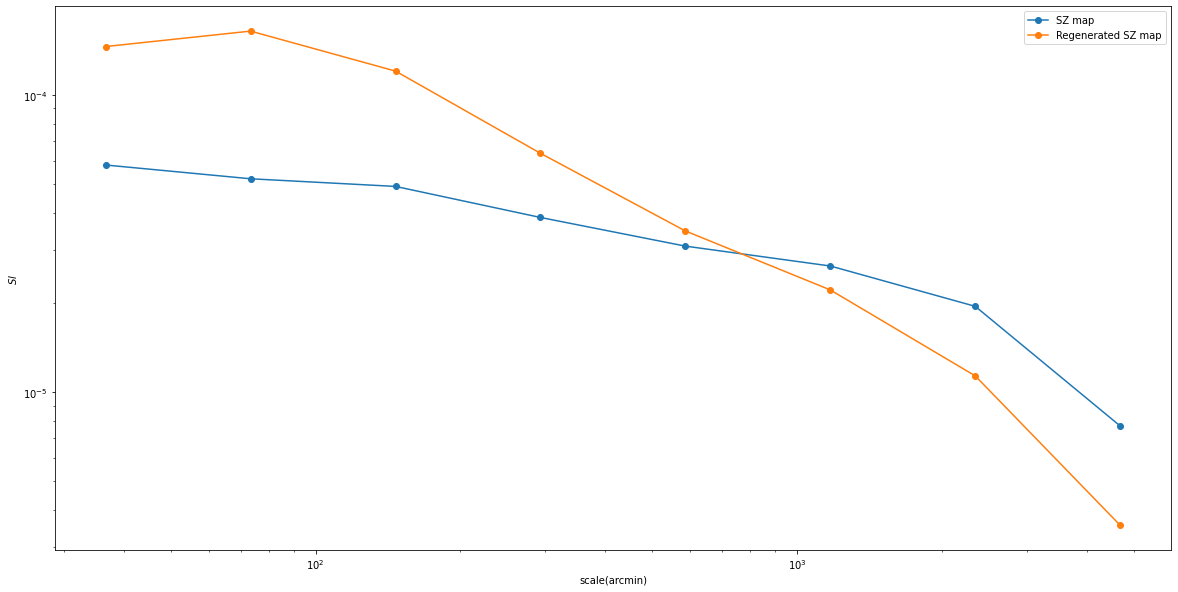

In [89]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.loglog(scale_0256,s1_sz_0256/s0_sz_0256,'o-')
plt.loglog(scale_0256,s1_sz_0256_out/s0_sz_0256_out,'o-')
plt.legend(["SZ map", "Regenerated SZ map"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

In [75]:
cl_sz_0256_out = hp.anafast (map_sz_0256_out)
dl_sz_0256_out = cl_sz_0256_out*norm_0256
dl_sz_0256 = cl_sz_0256*norm_0256

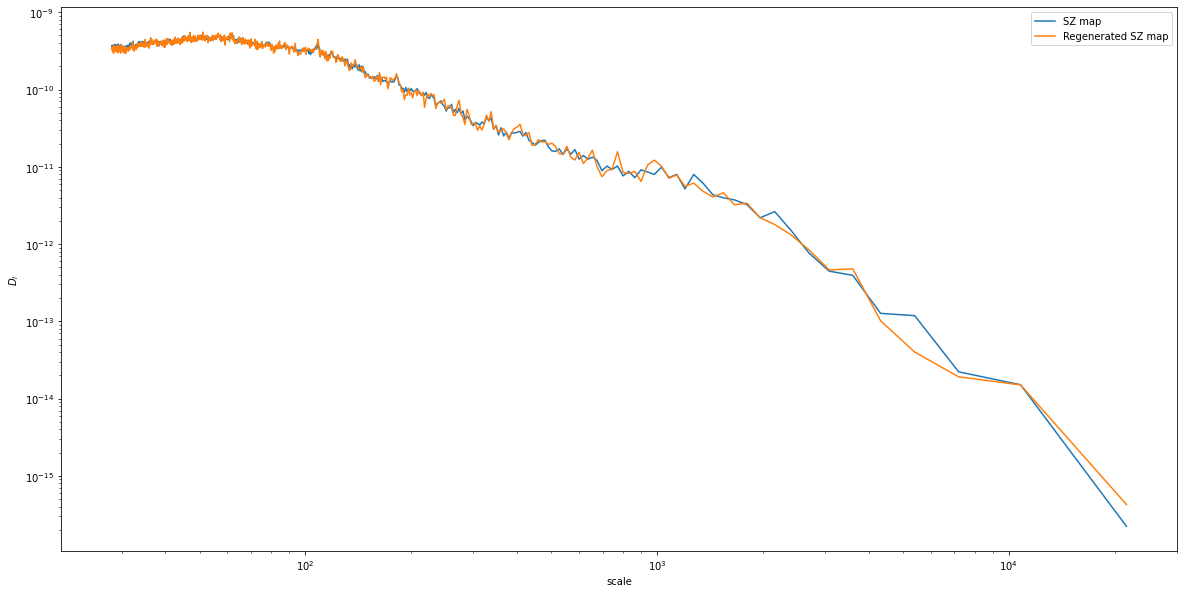

In [76]:
fig = plt.figure (figsize = (20,10))
plt.loglog(ellsc_0256, dl_sz_0256)
plt.loglog(ellsc_0256, dl_sz_0256_out)
plt.xlabel("scale")
plt.ylabel("$D_l$")
plt.legend (["SZ map" , "Regenerated SZ map"])


In [90]:
s2_sz_0256 , i2_sz_0256  = ST.compS2 ( i1_sz_0256, mor_l_0256 , jmax,  nside_0256 )

0
1
2
3
4
5
6
7


In [91]:
s2_sz_0256_out , i2_sz_0256_out = ST.compS2 ( i1_sz_0256_out, mor_l_0256,  jmax,  nside_0256 )

0
1
2
3
4
5
6
7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


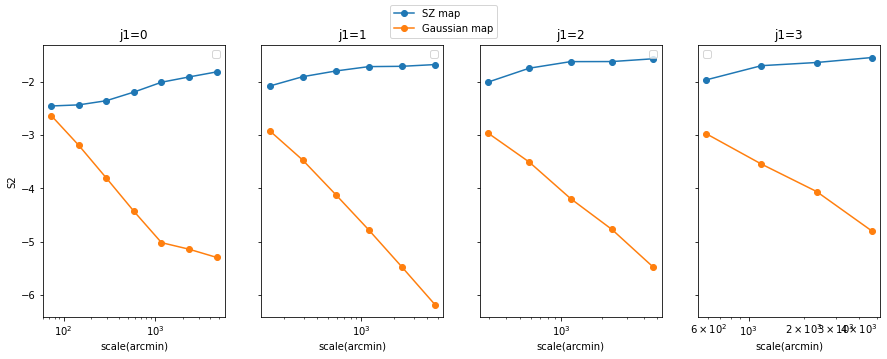

In [115]:
fig, ax = plt.subplots(1, 4,sharey=True,squeeze=True,figsize=(15,5))
for j in range (4):
    ax[j].plot (scale_0256[j+1:],np.log(s2_sz_0256[j,j+1:]/s1_sz_0256[j]),'o-',lw = 1.5 , color ="C0")
    ax[j].plot (scale_0256[j+1:],np.log(s2_sz_0256_out[j,j+1:]/s1_sz_0256_out[j]),'o-', lw=1.5 , color="C1")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].set_xlabel('scale(arcmin)')
    ax[j].legend()
    

ax[0].set_ylabel("S2")
fig.legend (["SZ map" , "Gaussian map"], loc = 'upper center')
fig.savefig("SZ_S2_poster.pdf")

array([4.54939623e-07, 4.08917284e-07, 3.85397244e-07, 3.02983885e-07,
       2.42625931e-07, 2.07992829e-07, 1.52144077e-07, 6.02012767e-08])

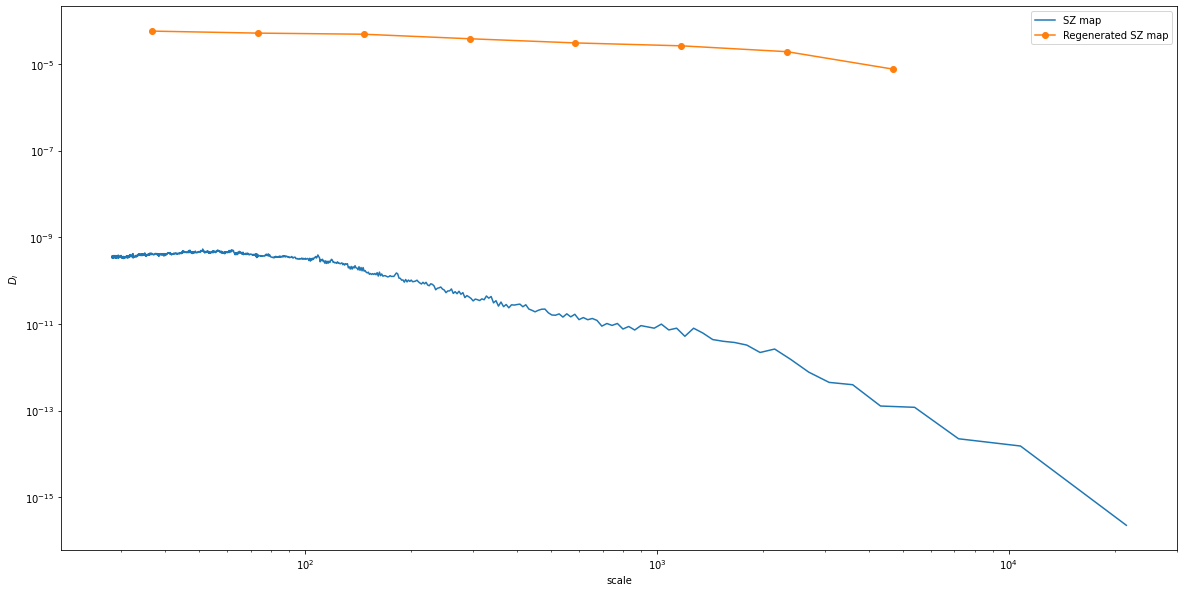

In [98]:
fig = plt.figure (figsize = (20,10))
plt.loglog(ellsc_0256, dl_sz_0256)
plt.loglog(scale_0256, s1_sz_0256/s0_sz_0256,'o-')
plt.xlabel("scale")
plt.ylabel("$D_l$")
plt.legend (["SZ map" , "Regenerated SZ map"])